Download file from Google Drive

In [6]:
!wget -O data.pdf 'https://drive.google.com/uc?export=download&id=18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD'

--2025-08-30 20:17:32--  https://drive.google.com/uc?export=download&id=18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD
正在查找主機 drive.google.com (drive.google.com)... 142.250.204.46
正在連接 drive.google.com (drive.google.com)|142.250.204.46|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 303 See Other
位置: https://drive.usercontent.google.com/download?id=18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD&export=download [跟隨至新的 URL]
--2025-08-30 20:17:32--  https://drive.usercontent.google.com/download?id=18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD&export=download
正在查找主機 drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.77.1
正在連接 drive.usercontent.google.com (drive.usercontent.google.com)|142.250.77.1|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 302 Found
位置: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.usercontent.google.com/download?id%3D18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD%26export%3Ddownload&followup=https://drive.usercontent.google.com/download?id%3D18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD%2

Embedding, application, and representation

In [2]:
import numpy as np
import pandas as pd
import os
import re
import time
import nltk
from gensim.models import Word2Vec
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#Run once for your environment
#nltk.download('punkt_tab')

In [4]:
#this for unzip and read the file
!wget -O IMDB.zip 'https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true'
!unzip IMDB.zip
df=pd.read_csv("IMDB Dataset.csv")

--2025-09-03 00:15:26--  https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
正在查找主機 github.com (github.com)... 20.27.177.113
正在連接 github.com (github.com)|20.27.177.113|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 302 Found
位置: https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip [跟隨至新的 URL]
--2025-09-03 00:15:27--  https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip
繼續使用和 github.com:443 的連線。
已送出 HTTP 要求，正在等候回應... 302 Found
位置: https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip [跟隨至新的 URL]
--2025-09-03 00:15:27--  https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip
正在查找主機 raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
正在連接 raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 200 OK
長度: 26962657 (26M) [application/zip]
儲存到：「IMDB.zip」


In [5]:
def preprocessing_reviews(reviews):

    """
    simple preprocessing: splitting on the space and remove word less than 1 chr
    """

    processed_reviews = []

    for review in tqdm(reviews):
        review = re.sub('<[^>]+>', '', review)
        # 只移除 HTML 和不想要的標點，但保留撇號。後續直接用 nltk.word_tokenize。
        processed = re.sub('[^a-zA-Z \']', '', review)
        words = processed.split()
        processed_reviews.append(' '.join([word.lower() for word in words if len(word) > 1]))
    return processed_reviews

df['reviews_processed'] = preprocessing_reviews(df['review'])
df['tokens'] = df['reviews_processed'].apply(nltk.word_tokenize)
df.head()

100%|██████████████████████████████████| 50000/50000 [00:01<00:00, 26192.70it/s]


,review,sentiment,reviews_processed,tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,wonderful little production the filming techni...,"[wonderful, little, production, the, filming, ..."
2,I thought this was a wonderful way to spend ti...,positive,thought this was wonderful way to spend time o...,"[thought, this, was, wonderful, way, to, spend..."
3,Basically there's a family where a little boy ...,negative,basically there's family where little boy jake...,"[basically, there, 's, family, where, little, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei's love in the time of money is v...,"[petter, mattei, 's, love, in, the, time, of, ..."


In [6]:
start_time = time.time()
# embedding
model = Word2Vec(sentences=df['tokens'].tolist(),
                 sg=1,
                 vector_size=100,
                 window=5,
                 workers=4)

print(f'Time needed : {(time.time() - start_time) / 60:.2f} mins')

Time needed : 1.72 mins


In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

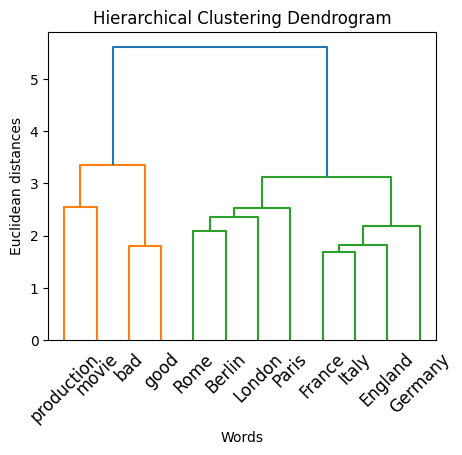

In [8]:
# Entire set of words in the model
all_words = list(model.wv.index_to_key)  
all_vectors = np.array([model.wv[word] for word in all_words])

# Highlighted words and their vectors
highlight_words = ['Berlin', 'Paris', 'London','Rome', 'Italy',
                   'France', 'Germany', 'England', 'movie', 'production', 'good', 'bad']
highs = [w.lower() for w in highlight_words]
indices = [all_words.index(word) for word in highs if word in all_words]
highlight_vectors = np.array([all_vectors[index] for index in indices])

# Hierarchical Clustering
# linkage 函式的輸出 linked 是一個被稱為連結矩陣 (Linkage Matrix) 的 NumPy 陣列。
# Ward's method ('ward') 的目標是最小化「群內變異數的增加量」。
# 簡單來說，在每一步合併時，它會選擇那一對合併後，能讓新形成的群組內部成員「最緊湊、最相似」的組合。
# 這種方法傾向於產生大小較為均勻的群組。
linked = linkage(highlight_vectors, 'ward')

plt.figure(figsize=(5, 4))
dendrogram(linked,
           orientation='top',
           labels=highlight_words,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Words')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=45)
plt.savefig('word_dendrogram.jpg', format='jpeg', bbox_inches='tight')
plt.show()

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns
from adjustText import adjust_text

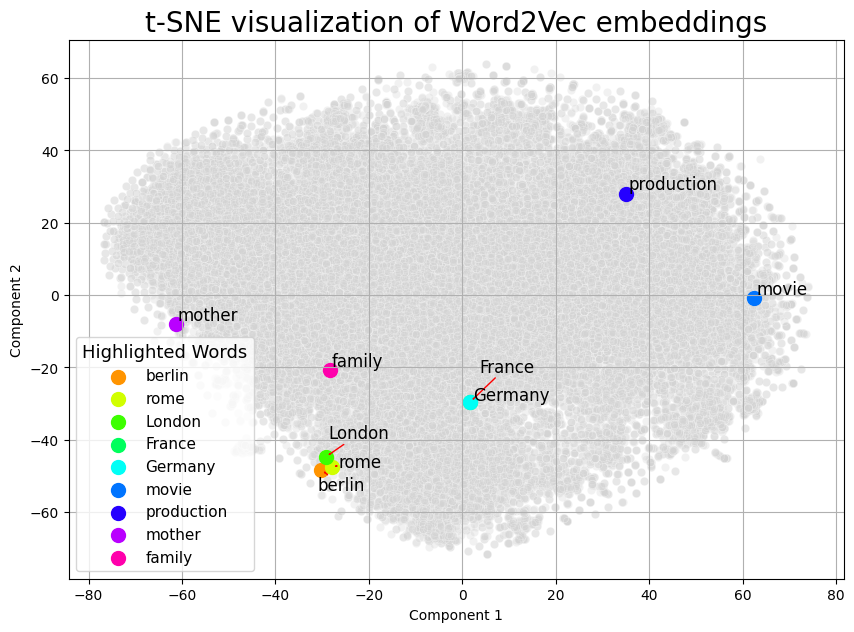

In [10]:
# Apply t-SNE to the entire set of vectors
tsne = TSNE(n_components=2, random_state=0)
Y_tsne = tsne.fit_transform(all_vectors)

highlight_words = ['berlin', 'rome', 'London', 'France', 'Germany',
                    'movie', 'production', 'mother', 'family']

highs = [w.lower() for w in highlight_words]
indices = [all_words.index(word) for word in highs if word in all_words]
highlight_vectors = np.array([all_vectors[index] for index in indices])
Y_highlight = Y_tsne[indices]

plt.figure(figsize=(10, 7))

sns.scatterplot(x=Y_tsne[:, 0], y=Y_tsne[:, 1], color="lightgrey", alpha=0.3)

# Plot highlighted words 
palette = sns.color_palette("hsv", len(highlight_words))
texts = []
for i, word in enumerate(highlight_words):
    plt.scatter(Y_highlight[i, 0], Y_highlight[i, 1], color=palette[i], s=100, label=word)
    # adjust text
    texts.append(plt.text(Y_highlight[i, 0], Y_highlight[i, 1], word, fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('t-SNE visualization of Word2Vec embeddings', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.grid(True)
plt.legend(title='Highlighted Words', title_fontsize='13', fontsize='11')
plt.savefig('word_tsne.jpg', format='jpeg')
plt.show()

In [11]:
from umap import UMAP

/Users/matt/Github/venv.ai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/matt/Github/venv.ai/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


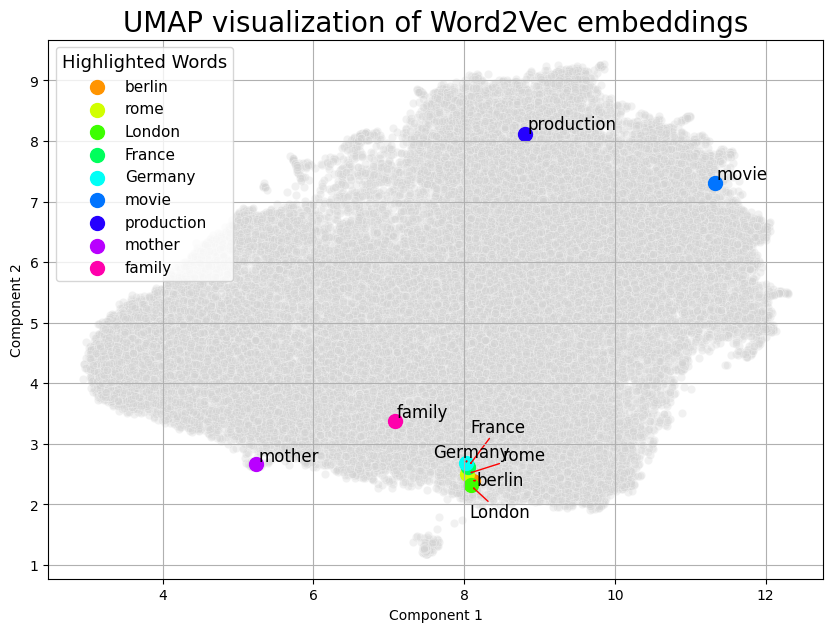

In [12]:
# Apply UMAP to the entire set of vectors
umap = UMAP(n_components=2, random_state=42)  
Y_umap = umap.fit_transform(all_vectors)

Y_highlight = Y_umap[indices]

plt.figure(figsize=(10, 7))
sns.scatterplot(x=Y_umap[:, 0], y=Y_umap[:, 1], color="lightgrey", alpha=0.3)

palette = sns.color_palette("hsv", len(highlight_words))
texts = []
for i, word in enumerate(highlight_words):
    plt.scatter(Y_highlight[i, 0], Y_highlight[i, 1], color=palette[i], s=100, label=word)

    texts.append(plt.text(Y_highlight[i, 0], Y_highlight[i, 1], word, fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('UMAP visualization of Word2Vec embeddings', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.grid(True)
plt.legend(title='Highlighted Words', title_fontsize='13', fontsize='11')
plt.savefig('word_umap.jpg', format='jpeg')
plt.show()

In [13]:
word_1 = "good"
syn = "great"
ant = "bad"
most_sim =model.wv.most_similar("good")
print("Top 3 most simalr words to {} are :{}".format(word_1, most_sim[:3]))

synonyms_dist = model.wv.distance(word_1, syn)
antonyms_dist = model.wv.distance(word_1, ant)
print("Synonyms {}, {} have cosine distance: {}".format(word_1, syn, synonyms_dist))
print("Antonyms {}, {} have cosine distance: {}".format(word_1, ant, antonyms_dist))
a = 'king'
a_star = 'man'
b = 'woman'
b_star= model.wv.most_similar(positive=[a, b], negative=[a_star])
print("{} is to {} as {} is to: {} ".format(a, a_star, b, b_star[0][0]))

Top 3 most simalr words to good are :[('decent', 0.8148519396781921), ('great', 0.7818940877914429), ('bad', 0.7750296592712402)]
Synonyms good, great have cosine distance: 0.21810591220855713
Antonyms good, bad have cosine distance: 0.224970281124115
king is to man as woman is to: queen 
